In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Markdown
%matplotlib inline

In [2]:
# un bouton pour cacher le code, permet un output plus joli...
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show code."></form>''')

In [3]:
def plot_daily(daily, key):
    display(Markdown(f'# <center> {key} </center>'))
    # Overview
    print('Overview :')
    display(daily.reset_index().groupby(['group', 'view', 'is_conv'])['count'].sum().to_frame())

    # Count by A/B group
    plt.figure()
    daily_count = daily.reset_index().groupby(['date', 'group'])['count'].sum()
    daily_count.unstack().plot(title='Count by A/B group')
    plt.show()

    # Overall conversion rate
    conv_rate_agg = daily.xs(1, level='is_conv').rename('is_conv_count').reset_index()
    conv_rate_agg = conv_rate_agg.groupby(['date', 'group'])['is_conv_count'].sum().reset_index()
    conv_rate_agg = conv_rate_agg.merge(daily_count.reset_index(), how='left', on =['date', 'group'])
    conv_rate_agg.loc[:, 'conv_rate'] = conv_rate_agg['is_conv_count'] / conv_rate_agg['count']
    conv_rate_agg = conv_rate_agg.set_index(['date', 'group'])['conv_rate']
    plt.figure()
    conv_rate_agg.unstack().plot(style='.')
    plt.title('Conversion rate by A/B group')
    plt.show()

    # View count by A/B group
    view_count = daily.reset_index().groupby(['date', 'group', 'view'])['count'].sum()
    plt.figure(figsize=(14, 10))
    for i, group in enumerate(['A', 'B']):
        plt.subplot(2, 2, i+1)
        try:
            view_count.xs(group, level='group').unstack().plot(ax=plt.gca())
            plt.title(group)
        except KeyError:
            pass
    plt.suptitle('Count by A/B group and view')
    plt.show()
    
    # View rate 
    view_rate = view_count.unstack()
    plt.figure()
    if 1 in view_rate.columns:
        view_rate = view_rate.assign(view_sum=lambda x: x.sum(1)).assign(view_rate=lambda x: x[1] / x['view_sum'])
        view_rate = view_rate['view_rate'].unstack()
        view_rate.plot()
    plt.title('View rate by A/B group')
    plt.show()
    
    # Conversion rate with respect to view
    conv_rate_by_view = daily.xs(1, level='is_conv').rename('is_conv_count').reset_index().merge(
        view_count.reset_index(), on=['date', 'group', 'view'], how='left'
    )
    conv_rate_by_view.loc[:, 'view_conv_rate'] = conv_rate_by_view['is_conv_count'] / conv_rate_by_view['count']
    conv_rate_by_view = conv_rate_by_view.set_index(['date', 'group', 'view'])['view_conv_rate']
    plt.figure(figsize=(14, 10));
    for i, group in enumerate(['A', 'B']):
        plt.subplot(2, 2, i+1)
        try:
            conv_rate_by_view.xs(group, level='group').unstack().plot(ax=plt.gca(), style='.')
        except KeyError:
            pass
        plt.title(group)
    plt.suptitle('Conversion rate by A/B group and view')
    plt.show()


# <center> annonceur2_campaign1_visite_page_produit </center>

Overview :


count
group view is_conv         
A     0    0        4703288
           1              6
      1    0        1389012
           1             57
B     0    0        4841395
           1              3
      1    0        1426188
           1             13

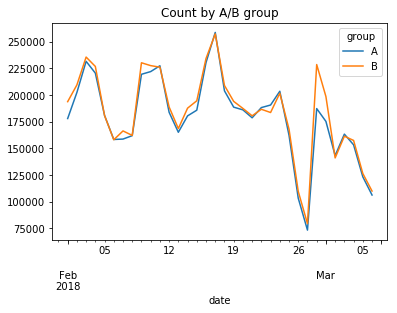

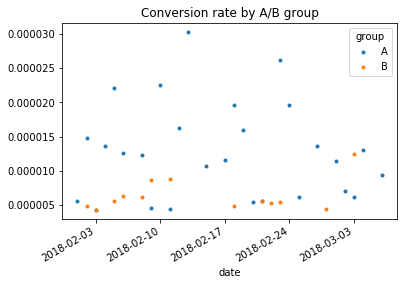

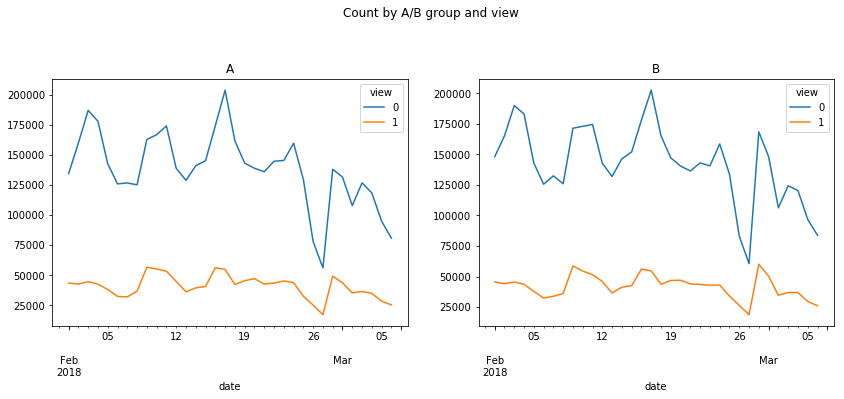

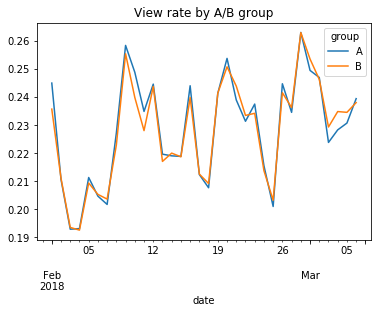

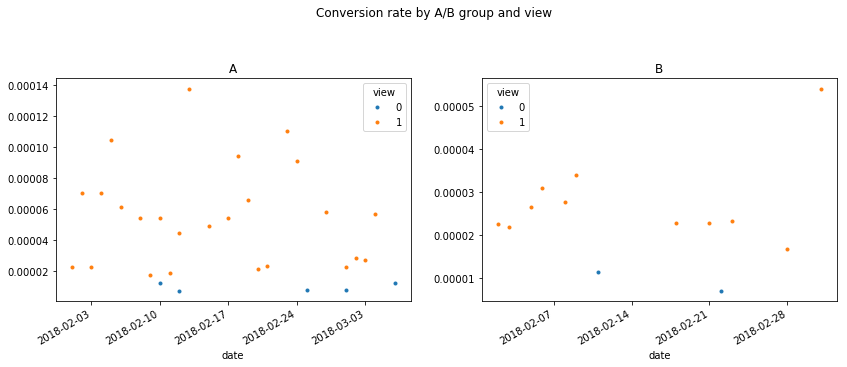

In [4]:
# key = 'annonceur2_campaign1_visite_panier'
# key = 'annonceur2_campaign1_achat'
key = 'annonceur2_campaign1_visite_page_produit'
daily = pd.read_hdf('Data/annonceur2/annonceur2_daily.hdf', key=key)

 
# key = 'annonceur1_campaign1_visite_2pages'
# key = 'annonceur1_campaign1_visite_engagee'
# key = 'annonceur1_campaign2_visite_2pages'
# key = 'annonceur1_campaign2_visite_engagee'
# key = 'annonceur1_campaign3_visite_2pages'
# key = 'annonceur1_campaign3_visite_engagee'
# key = 'annonceur1_campaign4_visite_2pages'
# key = 'annonceur1_campaign4_visite_engagee'

# daily = pd.read_hdf('Data/annonceur1/annonceur1_daily.hdf', key=key)

plot_daily(daily, key)